In [1]:
from fastai.text.all import *
import pandas as pd

In [2]:
text_df = pd.read_csv("/content/Corona_NLP.csv", encoding='latin1')

In [3]:
text_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [4]:
text_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [5]:
dls = TextDataLoaders.from_df(text_df,
                              text_col='OriginalTweet',
                              label_col='Sentiment',
                              valid_pct=0.2,
                              bs=64,
                              )


In [6]:
#Fast AI uses tokenization, that's why the words are weird

dls.show_batch()


,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,"xxbos xxmaj why ca nt items like xxmaj masks , xxmaj hand xxmaj sanitizers be declared xxup xxunk or even free to poor ? xxmaj when we can do d same for xxup movies why not these items \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5 ? xxrep 4 ? ? ? xxrep 4 ? https : / / t.co / xxunk",Extremely Positive
2,xxbos $ xxunk a xxup look xxup at xxup the xxup weekly & & xxup monthly xxup xxunk xxrep 4 ! xxup silver xxup prices xxup set xxup to xxup rise xxup rapidly xxrep 3 ! xxup the xxup worlds xxup supply xxup is xxup on xxup halt xxup due xxup to xxup covid-19 .. xxup do nt xxup fall xxup asleep xxup during xxup this ! ! $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk xxup best xxup chart xxup in xxup the xxup otc xxup at xxup this xxup price https : / / t.co / xxunk,Extremely Positive
3,"xxbos hiked prices in the face of the xxmaj covid-19 crises are listed below : \r\r\n xxmaj mas xxmaj bazar â xxunk xxmaj xxunk xxmaj road , xxup e1 xxunk . \r\r\n xxmaj xxunk xxmaj bazaar â 84 xxmaj xxunk xxmaj rd , xxup xxunk xxunk \r\r\n xxmaj fish xxmaj bazar â xxunk xxmaj xxunk street , xxup e1 xxunk . \r\r\n xxmaj xxunk xxmaj bazar â xxunk - xxunk xxmaj xxunk xxmaj street , xxup e1 xxunk . \r\r\n xxmaj xxunk xxmaj brother limited â xxunk - xxunk xxmaj mile xxmaj end xxmaj xxunk",Negative
4,"xxbos xxmaj men , xxup step xxup the # xxup xxunk xxup up ! ! xxmaj during this # xxmaj coronavirus pandemic , xxmaj do xxup not allow your xxunk / childrenâs mom , to go to the supermarket with the kids ! ! xxup you xxup go ! ! xxmaj whether you live with her or not # xxup xxunk , xxup you # xxunk and xxup you take the risk for # xxup covid19 , not your kids . # xxunk ? ? https : / / t.co / xxunk",Negative
5,xxbos xxunk xxup can xxup you xxup tell xxup my xxup claim xxup submitted xxup against xxup covid 19 ( carona xxup virus ) xxup on 30 xxup march xxup and xxup now xxup going 12 xxup april xxup my xxup claim xxup already xxup pending xxup in xxup xxunk xxup stage xxup which xxup is ( xxup pending xxup from xxup da xxup account ) xxup xxunk xxup today xxup or xxup tomorrow xxup not xxup settle xxup my xxup claim i xxup will xxup go xxup consumer xxup cor,Neutral
6,"xxbos xxup covid-19 xxmaj special xxup live phone - in xxmaj program with xxmaj shri xxup k. xxmaj xxunk , xxmaj xxunk xxmaj minister for xxmaj food , xxmaj civil xxmaj supplies & & xxmaj consumer xxmaj affairs and xxmaj legal xxmaj xxunk xxmaj department . xxmaj watch it on xxup dd xxmaj xxunk from 12 pm xxmaj xxunk / 04 / 20 ) . \r\r\n xxmaj call us at xxunk - xxunk / xxunk to xxmaj interact .. \r\r\n▁ # stayathome # indiafightscorona https : / / t.co / xxunk",Positive
7,"xxbos xxmaj the xxmaj amazing xxmaj lowest xxmaj prices offers are here ? \r\r\n xxmaj the supermarket is available in xxmaj xxunk , xxmaj old xxmaj airport xxmaj and xxmaj al xxmaj xxunk \r\r\n ? old airport branch is open 24 / 7 ? \r\r\n xxmaj get xxup pdf here : https : / / t.co / xxunk \r\r\n\r\r\n . \r\r\n . \r\r\n▁ # xxunk # xxunk # supermarket # offer # deals # qatar # doha # covid_19 # corona # covid https : / / t.co / xxunk",Positive
8,xxbos # xxup cbd xxup can not xxup cure xxup the # xxup coronavirus xxup but xxup it xxup can \r\r\n▁ ? xxup cure xxup coronavirus xxup symptoms \r\r\n▁ ? xxup ease xxup your xxup anxiety \r\r\n▁ ? xxup boost xxup im

In [7]:
learn = text_classifier_learner(dls,
                                AWD_LSTM,
                                drop_mult=0.5, 
                                metrics=accuracy
                                )


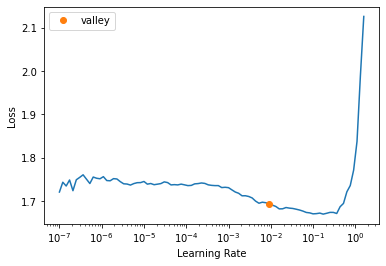

In [8]:
best_learning_rate = learn.lr_find()


In [9]:
learn.fine_tune(4, best_learning_rate[0])

epoch,train_loss,valid_loss,accuracy,time
0,1.447970,1.384032,0.386587,00:54


epoch,train_loss,valid_loss,accuracy,time
0,1.151975,0.992652,0.593610,01:25
1,0.941565,0.805415,0.683514,01:25
2,0.793096,0.705428,0.731867,01:24
3,0.692197,0.682355,0.744867,01:24


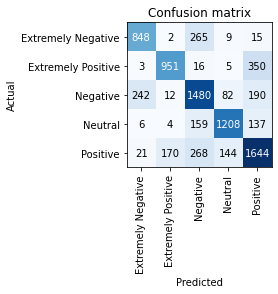

In [10]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

In [11]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

,input,target,predicted,probability,loss
0,"xxbos xxmaj mining companies are feeling the pressure , despite recent positive results brought by surging commodity prices and various cost - cutting initiatives . https : / / t.co / xxunk https : / / t.co / xxunk # xxmaj covid_19 # xxmaj africa # xxunk # mining # economy # business",Extremely Negative,Positive,0.7544365525245667,8.365785598754883
1,xxbos xxmaj hey xxmaj supermarket staff finally get some recognition due to and xxunk xxunk the shelves while xxmaj rome xxunk thing is can t take care of their own can t even put a loaf of bread aside for their families get disciplined,Negative,Extremely Positive,0.838138997554779,7.497926712036133
2,xxbos xxmaj grocery store workers deserve a big ass bonus this year for the shit they go through and the risk they take with this # coronavirus @shopritestores xxunk @acmemarkets @walgreens @cvspharmacy @wholefoods @publix,Positive,Extremely Negative,0.9097124934196472,7.15192985534668
3,xxbos # xxmaj gold xxmaj prices xxmaj steady xxmaj despite xxmaj increased # xxmaj coronavirus xxmaj stimulus xxmaj hopes $ gld $ oil https : / / t.co / xxunk,Negative,Extremely Positive,0.6157456636428833,6.967466831207275
4,xxbos xxmaj what a cruel act to commit xxmaj karma is real y all xxmaj don t be like this,Neutral,Extremely Negative,0.9001927375793457,6.582542896270752
5,xxbos xxmaj more of this gt xxmaj minnesota and xxmaj vermont will classify grocery store employees as emergency workers,Neutral,Negative,0.6291570067405701,6.52355432510376
6,xxbos xxmaj please do n't be a but supermarket xxunk # xxmaj covid_19 # coronavirus # stayathome,Extremely Negative,Positive,0.8105106949806213,6.277546405792236
7,xxbos xxmaj interesting thread re âpanic buyingâ ? https : / / t.co / xxunk,Negative,Positive,0.6551743149757385,6.18719482421875
8,xxbos struggle as demand explodes thanks to layoffs,Neutral,Positive,0.3972938358783722,6.1141252517700195
